In [1]:

import matplotlib as plt
from inference.bertInference import getPredictions,getValData
from analysis.DataStatistics import get_truth, calc_metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd
import numpy as np

labels = ['Organisation','Person','Location','Money','Temporal','Weapon','MilitaryPlatform','O']
extended_labels = ['Location','Quantity', 'Nationality', 'MilitaryPlatform', 'Temporal', 'Person', 'Organisation', 'Vehicle', 'Weapon','O']

In [2]:
gen_data_path = "../../data/selv-labeled-data/ValData/ValGEN.txt"
gen_conll_path = "../../data/selv-labeled-data/ValData/valgen.conll"
valDataGeneral = getValData(gen_data_path)

#Get predictions and truth vectors, label list
prediction_json = "../inference/bertPredictionsB06.json"
predictions = getPredictions(prediction_json, data = valDataGeneral)
#print(predictions.to_string())
prediction_vector = predictions['ner_tags'].tolist()

truth_set = get_truth(gen_conll_path)
print(truth_set.to_string())
truth_vector = truth_set['ner_tags'].tolist()


              words          ner_tags
0                On                 O
1               the          Temporal
2               6th          Temporal
3                of          Temporal
4          November          Temporal
5              2023          Temporal
6              high                 O
7           ranking                 O
8         officials                 O
9                of                 O
10              the      Organisation
11           Danish      Organisation
12         military      Organisation
13        discussed                 O
14              how                 O
15               to                 O
16           deploy                 O
17          special                 O
18           forces  MilitaryPlatform
19               in                 O
20       critically                 O
21       vulnerable                 O
22            areas                 O
23               in                 O
24        Cameroon.          Location
25          

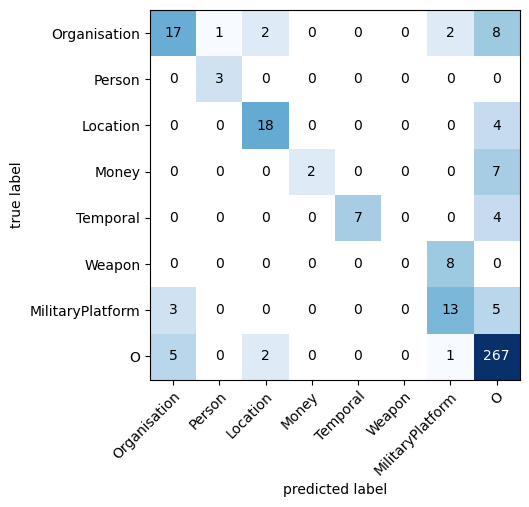

In [3]:
confusion_matrix_gen = confusion_matrix(truth_vector,prediction_vector, labels = labels)

fig, ax = plot_confusion_matrix(
    conf_mat=confusion_matrix_gen,
    class_names=labels,
    norm_colormap=plt.colors.LogNorm()
)


In [4]:
ukraine_data_path = "../../data/selv-labeled-data/ValData/ukraine_val_text.txt"
ukraine_data_path2 = "../../data/selv-labeled-data/ValData/ukraine_val_text2.txt"
ukraine_conll_path = "../../data/selv-labeled-data/ValData/ukraine_val.conll"
ukraine_data = getValData(ukraine_data_path)
ukraine_data2 = getValData(ukraine_data_path2)
#####
# Need to split data amount into 2 parts because of BERT limitation on input length   
#####

ukraine_truth = get_truth(ukraine_conll_path)
#print(ukraine_truth.to_string())
ukraine_truth_vector = ukraine_truth['ner_tags'].tolist()
unique = set(ukraine_truth_vector)
print(unique)

ukraine_prediction_json = "../inference/bertPredictionsB06V1.json"
ukraine_predictions = getPredictions(ukraine_prediction_json, data = ukraine_data)
ukraine_prediction_vector = ukraine_predictions['ner_tags'].tolist()
uk1_words = ukraine_predictions['words'].tolist()
#print(ukraine_predictions.to_string())

ukraine_prediction2_json = "../inference/bertPredictionsB06V2.json"
ukraine_predictions2 = getPredictions(ukraine_prediction2_json, data = ukraine_data2)
ukraine_prediction_vector2 = ukraine_predictions2['ner_tags'].tolist()
uk2_words = ukraine_predictions2['words'].tolist()
print(ukraine_predictions2.to_string())

combined_vector = list(np.append(ukraine_prediction_vector,ukraine_prediction_vector2))

uniques = set(ukraine_truth_vector)
print(len(uniques))
print(len(labels))
uniques_2 = set(combined_vector)
print(len(uniques_2))




{'Person', 'Temporal', 'Weapon', 'Organisation', 'O', 'Location', 'MilitaryPlatform'}


FileNotFoundError: [Errno 2] No such file or directory: '../inference/bertPredictionsB05V1.json'

c:\conda\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


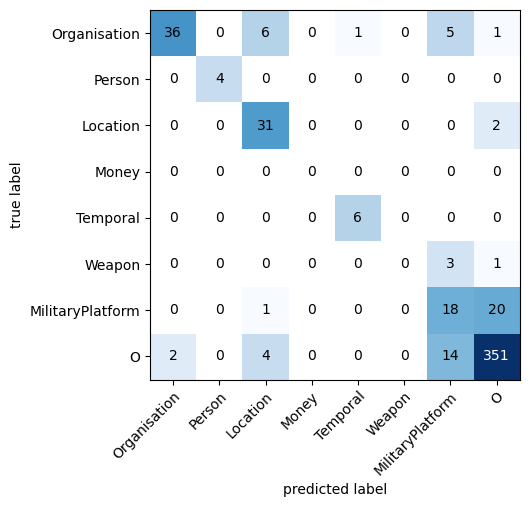

In [5]:
confusion_matrix_ukraine = confusion_matrix(ukraine_truth_vector,combined_vector, labels = labels)

fig, ax = plot_confusion_matrix(
    conf_mat=confusion_matrix_ukraine,
    class_names=labels,
    norm_colormap=plt.colors.LogNorm()
)

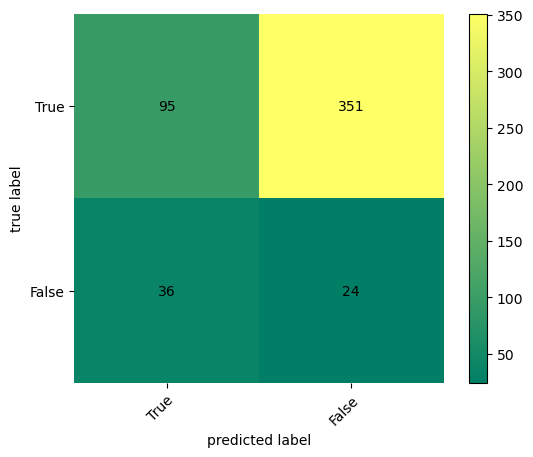

In [6]:
metrics_matrix = calc_metrics(confusion_matrix_ukraine, len(ukraine_truth_vector))
classes = ["True","False"]

fig1, ax1 = plot_confusion_matrix(
    conf_mat=metrics_matrix,
    class_names=classes,
    cmap= 'summer',
    colorbar=True,
    fontcolor_threshold=1,
    hide_spines = True
)